In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Génération de données synthétiques

## 1er jeu de données : gaussian mixtures

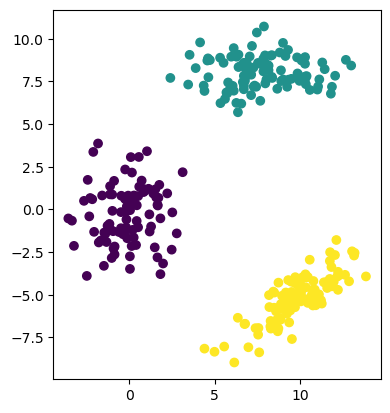

In [44]:
D = 2

mu = np.array([[0, 0], 
               [8, 8],
               [10, -5]])
sigma = np.array([[[2, .5], [.5, 3]], 
                  [[6, .3], [.3, 1]],
                  [[3, 2], [2, 2]]])

G = len(mu)
N = 300

tau = np.ones(G) / G
tau /= np.sum(tau)

data = np.zeros((N, D))
colors = np.zeros(N)

for i in range(N):
    k = np.random.choice(len(tau), p = tau)
    colors[i] = k
    data[i] = np.random.multivariate_normal(mu[k], sigma[k])

x = data[:, 0]
y = data[:, 1]

fig = plt.figure()

ax = plt.subplot(111)
ax.set_aspect(1.0 / ax.get_data_ratio())

ax.scatter(x, y, c = colors)

## 2eme jeu de données : cercles concentriques

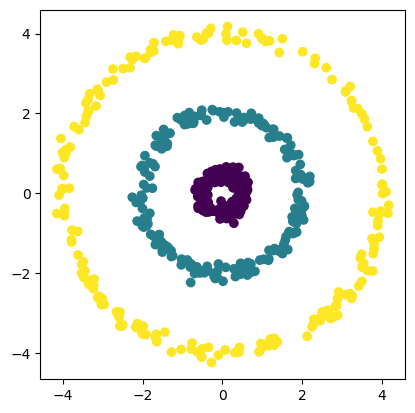

In [30]:
radii = [0.5,2 , 4]
Nperradii = 200
D = 2
N = len(radii) * Nperradii
noise = .1
data = np.zeros((N, D))
colors = np.zeros(N)

for k in range(len(radii)):
    radius = radii[k]
    for j in range(Nperradii):
        i = k * Nperradii + j
        # TODO : make it usable for D = 3
        theta = 2 * np.pi * np.random.uniform()
        r = radius + np.random.normal(scale=noise)
        data[i, 0] = r * np.cos(theta)
        data[i, 1] = r * np.sin(theta)
        colors[i] = radius
x = data[:, 0]
y = data[:, 1]

fig = plt.figure()

ax = plt.subplot(111)
ax.set_aspect(1.0 / ax.get_data_ratio())


ax.scatter(x, y, c = colors)

# Application de KPCA

Il y a une grande quantité de noyaux différents, en voici quelques uns

In [9]:
sqeuclidiannorm = lambda x: np.inner(x, x)

def gaussian_kernel(x, y, gamma = 0.1):
    return np.exp(-gamma * sqeuclidiannorm(x-y))

def polinomial_kernel(x, y):
    return (np.dot(x.T, y) + 1)**2

def linear_kernel(x, y) :
    return np.dot(x.T, y)

def proj(eigenvector, x, data, kernel):
    return np.sum([eigenvector[i] * kernel(x, data[i]) for i in range(len(data))])

Dans notre exemple, on choisit le noyau gaussien appliqué au mélange gaussien

Text(0, 0.5, 'Seconde composante principale')

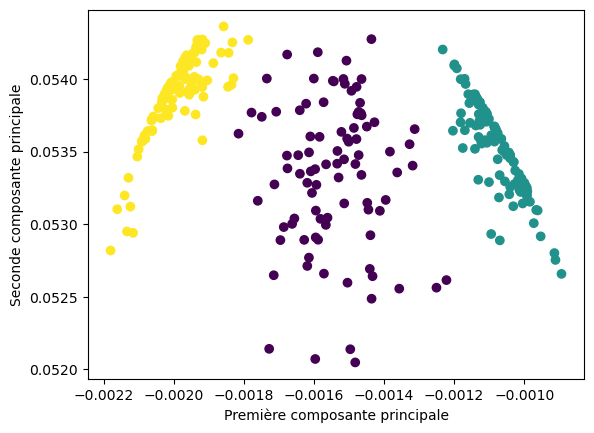

In [50]:
gamma = .0004
kernel = lambda x, y: gaussian_kernel(x, y, gamma) 

# création de la matrice de Gram 
K = np.zeros((N,N))
for i in range(N):
    for j in range(i, N):
        Kij = kernel(data[i], data[j])
        K[i, j] = Kij
        K[j, i] = Kij
        
N1  = np.ones((N,N)) / N
# normalisation des phi(x_i)
Ktild = K - np.dot(N1, K) - np.dot(K, N1) + np.dot(np.dot(N1, K), N1)

# Diagonalisation de la matrice de Gram
eigenvalues, eigenvectors = np.linalg.eig(Ktild)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# Normalisation des vecteurs propres
firstcomponent = eigenvectors[0]/np.linalg.norm(eigenvectors[0])/np.sqrt(eigenvalues[0]*N)
secondcomponent = eigenvectors[1]/np.linalg.norm(eigenvectors[1])/np.sqrt(eigenvalues[1]*N)

# Projection des données sur les vecteurs propres normalisés 
dataProj = np.zeros((N, 2))
for i in range(N):
    dataProj[i, 0] = proj(firstcomponent, data[i], data, kernel)
    dataProj[i, 1] = proj(secondcomponent, data[i], data, kernel)
    
# Affichage
plt.scatter(dataProj[:, 0], dataProj[:, 1], c = colors)
plt.xlabel("Première composante principale")
plt.ylabel("Seconde composante principale")